In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv('train.csv',parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [3]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test_df=pd.read_csv('test.csv',parse_dates=['pickup_datetime'])

In [5]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [6]:
train_df.shape

(1458644, 11)

In [7]:
test_df.shape

(625134, 9)

In [8]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [10]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [11]:

test_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [12]:
train_df = train_df.assign(hour=train_df.pickup_datetime.dt.hour,
               day=train_df.pickup_datetime.dt.day,
               month=train_df.pickup_datetime.dt.month,
               year=train_df.pickup_datetime.dt.year,
               second=train_df.pickup_datetime.dt.second,
               minute=train_df.pickup_datetime.dt.minute,
                        )

In [13]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,month,year,second,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,2016,55,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,2016,35,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,2016,24,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2016,31,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,2016,55,30
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,22,30,1,2016,40,1
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,17,6,2016,59,34
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7,21,5,2016,58,54
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,23,27,5,2016,23,12
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,21,10,3,2016,1,45


In [14]:
test_df = test_df.assign(hour=test_df.pickup_datetime.dt.hour,
               day=test_df.pickup_datetime.dt.day,
               month=test_df.pickup_datetime.dt.month,
               year=test_df.pickup_datetime.dt.year,
               second=test_df.pickup_datetime.dt.second,
               minute=test_df.pickup_datetime.dt.minute,
                        )

In [15]:
test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,day,month,year,second,minute
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,2016,58,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,2016,53,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,2016,47,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,2016,41,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,2016,33,59
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N,23,30,6,2016,30,59
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N,23,30,6,2016,15,59
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N,23,30,6,2016,9,59
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N,23,30,6,2016,55,58
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N,23,30,6,2016,46,58


In [16]:
test_df.shape

(625134, 15)

In [17]:
train_df.shape

(1458644, 17)

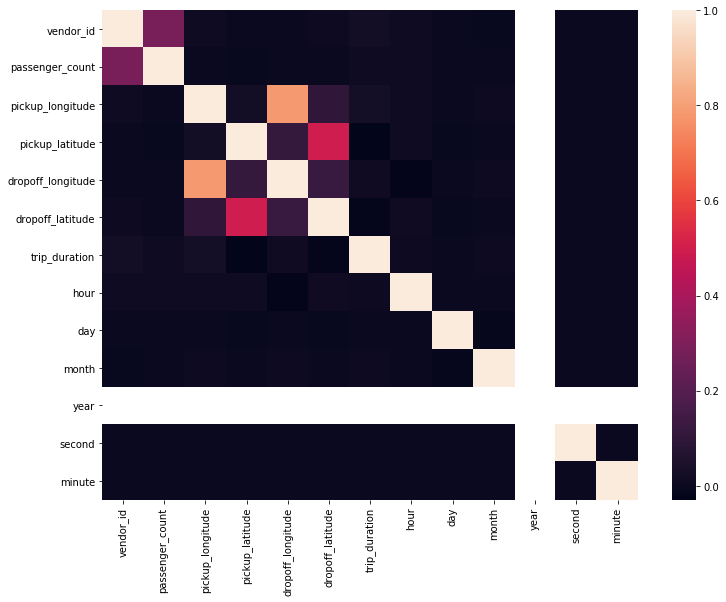

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cor=train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor)


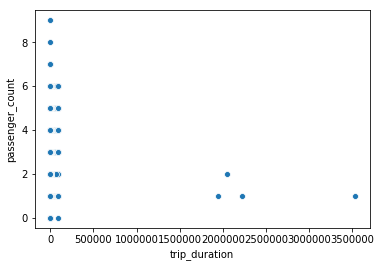

In [19]:
sns.scatterplot('trip_duration','passenger_count',data=train_df)

In [20]:
train_df['trip_duration'].mean()

959.4922729603659

In [21]:
train_df['pickup_time_minutes'] = train_df['pickup_datetime'].apply(lambda x : x.hour * 60.0 + x.minute)
#train_df.drop('pickup_datetime',axis=1,inplace=True)

In [22]:
test_df['pickup_time_minutes'] = test_df['pickup_datetime'].apply(lambda x : x.hour * 60.0 + x.minute)

In [23]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,month,year,second,minute,pickup_time_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,2016,55,24,1044.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,2016,35,43,43.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,2016,24,35,695.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2016,31,32,1172.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,2016,55,30,810.0


In [24]:
m = np.mean(train_df['trip_duration'])
s = np.std(train_df['trip_duration'])
train_df = train_df[train_df['trip_duration'] <= m + 2*s]
train_df = train_df[train_df['trip_duration'] >= m - 2*s]

In [25]:

train_df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,month,year,second,minute,pickup_time_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,2016,55,24,1044.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,2016,35,43,43.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,2016,24,35,695.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2016,31,32,1172.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,2016,55,30,810.0


In [26]:
train_df = train_df[train_df['pickup_longitude'] <= -73.75]
train_df = train_df[train_df['pickup_longitude'] >= -74.03]
train_df = train_df[train_df['pickup_latitude'] <= 40.85]
train_df = train_df[train_df['pickup_latitude'] >= 40.63]
train_df = train_df[train_df['dropoff_longitude'] <= -73.75]
train_df = train_df[train_df['dropoff_longitude'] >= -74.03]
train_df = train_df[train_df['dropoff_latitude'] <= 40.85]
train_df = train_df[train_df['dropoff_latitude'] >= 40.63]

In [27]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,month,year,second,minute,pickup_time_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,2016,55,24,1044.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,2016,35,43,43.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,2016,24,35,695.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2016,31,32,1172.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,2016,55,30,810.0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,22,30,1,2016,40,1,1321.0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,17,6,2016,59,34,1354.0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7,21,5,2016,58,54,474.0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,23,27,5,2016,23,12,1392.0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,21,10,3,2016,1,45,1305.0


In [28]:
train_df.shape

(1437128, 18)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


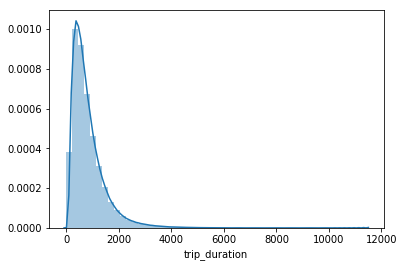

In [29]:
sns.distplot(train_df['trip_duration'])

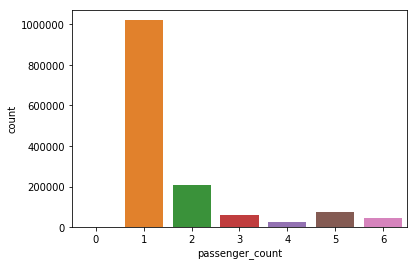

In [30]:
 sns.countplot('passenger_count', data=train_df)

In [31]:
train_df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
hour                   0
day                    0
month                  0
year                   0
second                 0
minute                 0
pickup_time_minutes    0
dtype: int64

In [32]:
test_df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
hour                   0
day                    0
month                  0
year                   0
second                 0
minute                 0
pickup_time_minutes    0
dtype: int64

In [33]:
train_df.shape

(1437128, 18)

In [34]:
test_df.shape


(625134, 16)

In [35]:
features_train = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "month", "day", "hour",'second','minute','year' ,"pickup_time_minutes"]

In [36]:
X_train = train_df[features_train]

In [37]:
y_train = train_df["trip_duration"]

In [38]:
features_test = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "month", "day", "minute",'hour','year','second', "pickup_time_minutes"]

In [39]:
X_test = test_df[features_test]

In [40]:
X_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,day,minute,hour,year,second,pickup_time_minutes
0,1,1,-73.988129,40.732029,-73.990173,40.756680,6,30,59,23,2016,58,1439.0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,6,30,59,23,2016,53,1439.0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,6,30,59,23,2016,47,1439.0
3,2,1,-73.956070,40.771900,-73.986427,40.730469,6,30,59,23,2016,41,1439.0
4,1,1,-73.970215,40.761475,-73.961510,40.755890,6,30,59,23,2016,33,1439.0


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features='auto', max_depth=50, bootstrap=True, n_jobs=-1)

In [58]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
log_pred = rf.predict(X_test)
y_pred = np.exp(log_pred) - np.ones(len(log_pred)) 

In [62]:
my_submission = pd.DataFrame({'id': test_df.id, 'trip_duration': log_pred})
my_submission.head()

,id,trip_duration
0,id3004672,789.064163
1,id3505355,647.980468
2,id1217141,518.017667
3,id2150126,1375.044417
4,id1598245,403.474262


In [46]:
#from sklearn.ensemble import GradientBoostingRegressor

In [48]:
#GBR = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')
#GBR.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
#print (GBR)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [50]:
#log_pred = GBR.predict(X_test)
y_pred = np.exp(log_pred) - np.ones(len(log_pred))

In [56]:
#my_submission = pd.DataFrame({'id': test_df.id, 'trip_duration':log_pred})
#my_submission.head()

,id,trip_duration
0,id3004672,768.426954
1,id3505355,832.488214
2,id1217141,768.426954
3,id2150126,768.426954
4,id1598245,768.426954


In [63]:
my_submission.to_csv("submission1.csv", index=False)

In [55]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,day,month,year,second,minute,pickup_time_minutes
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,2016,58,59,1439.0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,2016,53,59,1439.0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,2016,47,59,1439.0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,2016,41,59,1439.0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,2016,33,59,1439.0
